In [3]:
import scipy
from scipy import signal
import numpy as np
from matplotlib import pyplot as plt

The system equation is given by

\begin{align}
    x_t = \beta x_{t - 1} + (1 - \beta) u_t
\end{align}
where $u_t$ is a general input function.

In the z-plane, the transfer function looks like this

\begin{align}
    H(z) = \frac{(1 - \beta)z^{1}}{-\beta z^{0} + z}
\end{align}

In [4]:
beta = 0.9
b = [1 - beta, 0]
a = [1, -beta]

sys = signal.dlti(b, a)

In [5]:
sys.to_tf()

TransferFunctionDiscrete(
array([0.1, 0. ]),
array([ 1. , -0.9]),
dt: True
)

In [53]:
# Initial condition: x_0 = 0
tout, yout = sys.step(x0=0)
tout = tout + 1 # adam uses initial time-step 1
yout = np.squeeze(yout)
bias_correct = np.ones_like(yout) / (1 - beta**tout)
y_debiased = yout * bias_correct

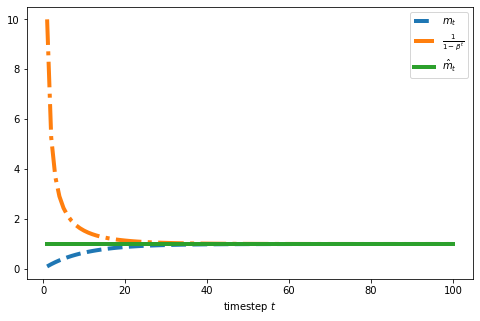

In [66]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
ax.plot(tout, yout, "--", linewidth=4, label=r"$m_t$")
ax.plot(tout, bias_correct, "-.", linewidth=4, label=r"$\frac{1}{1 - \beta^{t}}$")
ax.plot(tout, y_debiased, linewidth=4, label=r"$\hat{m}_t$")
ax.set_xlabel(r"timestep $t$")
ax.legend()
plt.savefig("debiasing_adam.png")